<a href="https://colab.research.google.com/github/SebastianJimenez612/ComputerVisionGrupo/blob/main/Tarea_2_image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
#pip install image_slicer

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

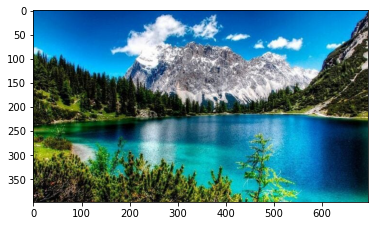

In [ ]:
original_image = Image.open('/data/image.jpg')
plt.imshow(original_image)
type(original_image)
# Save the image
np.save('/data/img.npy', original_image)
#Load the image
original_image = np.load('/data/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image. 

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

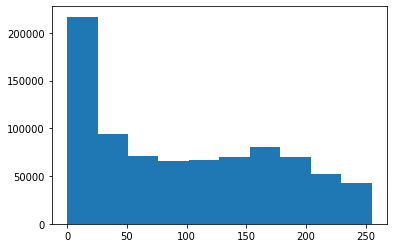

In [ ]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

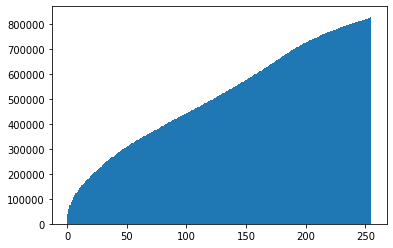

In [ ]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

/usr/local/lib/python3.8/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


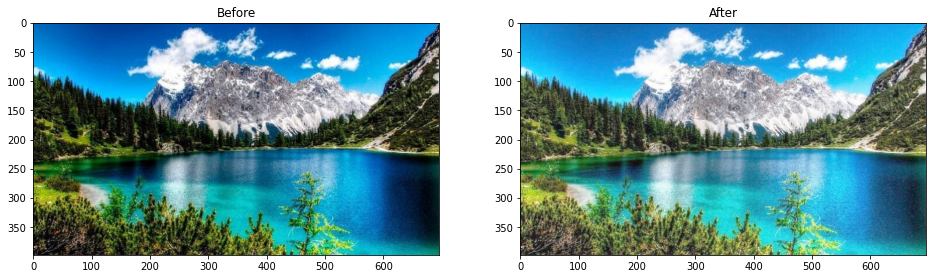

In [ ]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

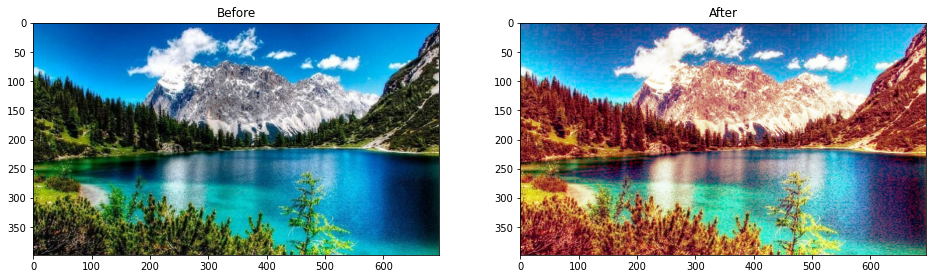

In [ ]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

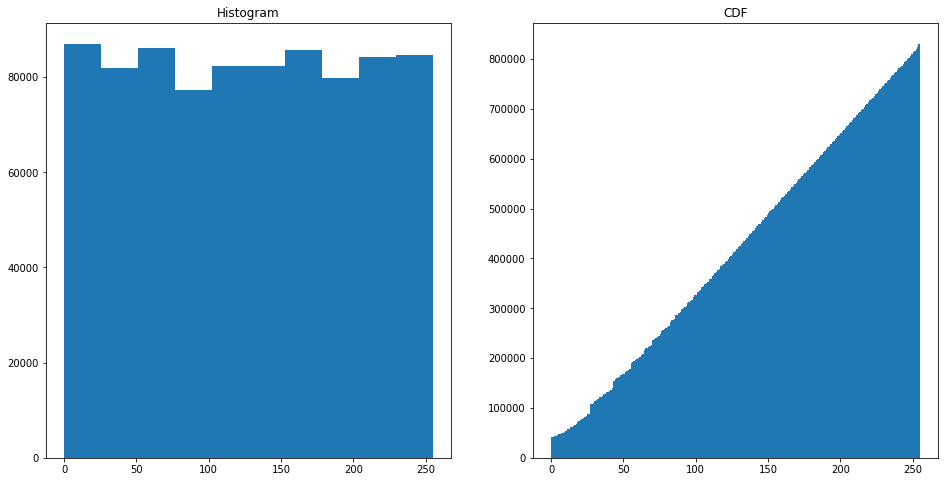

In [ ]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

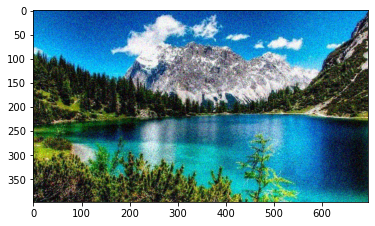

In [ ]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

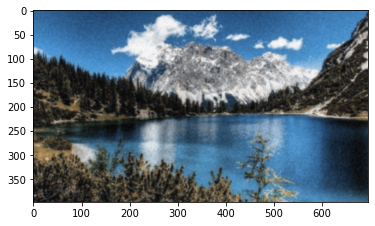

In [ ]:
img3_gauss = gauss(img_n, sigma=1)   
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

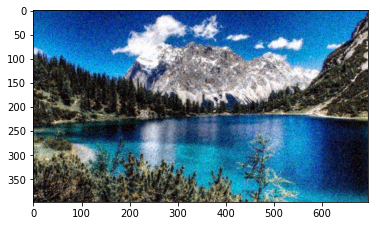

In [ ]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [ ]:
from image_slicer import slice
import image_slicer

control_image = Image.open('/data/image.jpg')

n = 4
tiles = slice('/data/image.jpg', n)

image_slicer.save_tiles(tiles, directory='/data',prefix='image', format='jpeg')

(<Tile #1 - image_01_01.jpg>,
 <Tile #2 - image_01_02.jpg>,
 <Tile #3 - image_02_01.jpg>,
 <Tile #4 - image_02_02.jpg>)

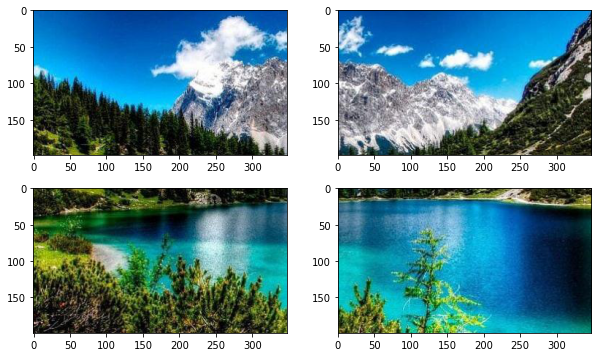

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img1 = Image.open(f'/data/image_01_01.jpg')
plt.imshow(img1)

plt.subplot(2,2,2)
img2 = Image.open(f'/data/image_01_02.jpg')
plt.imshow(img2)

plt.subplot(2,2,3)
img3 = Image.open(f'/data/image_02_01.jpg')
plt.imshow(img3)

plt.subplot(2,2,4)
img4 = Image.open(f'/data/image_02_02.jpg')
plt.imshow(img4)

plt.show()

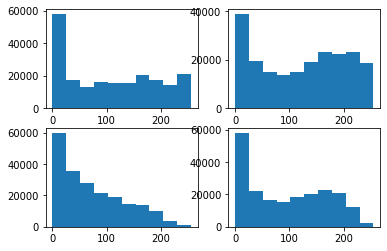

In [ ]:
# Save the image
np.save('/data/img1.npy', img1)
#Load the image
original_image1 = np.load('/data/img1.npy')

plt.subplot(2,2,1)
plt.hist(original_image1.ravel())

# Save the image
np.save('/data/img2.npy', img2)
#Load the image
original_image2 = np.load('/data/img2.npy')

plt.subplot(2,2,2)
plt.hist(original_image2.ravel())

# Save the image
np.save('/data/img3.npy', img3)
#Load the image
original_image3 = np.load('/data/img3.npy')

plt.subplot(2,2,3)
plt.hist(original_image3.ravel())

# Save the image
np.save('/data/img4.npy', img4)
#Load the image
original_image4 = np.load('/data/img4.npy')

plt.subplot(2,2,4)
plt.hist(original_image4.ravel())

plt.show()



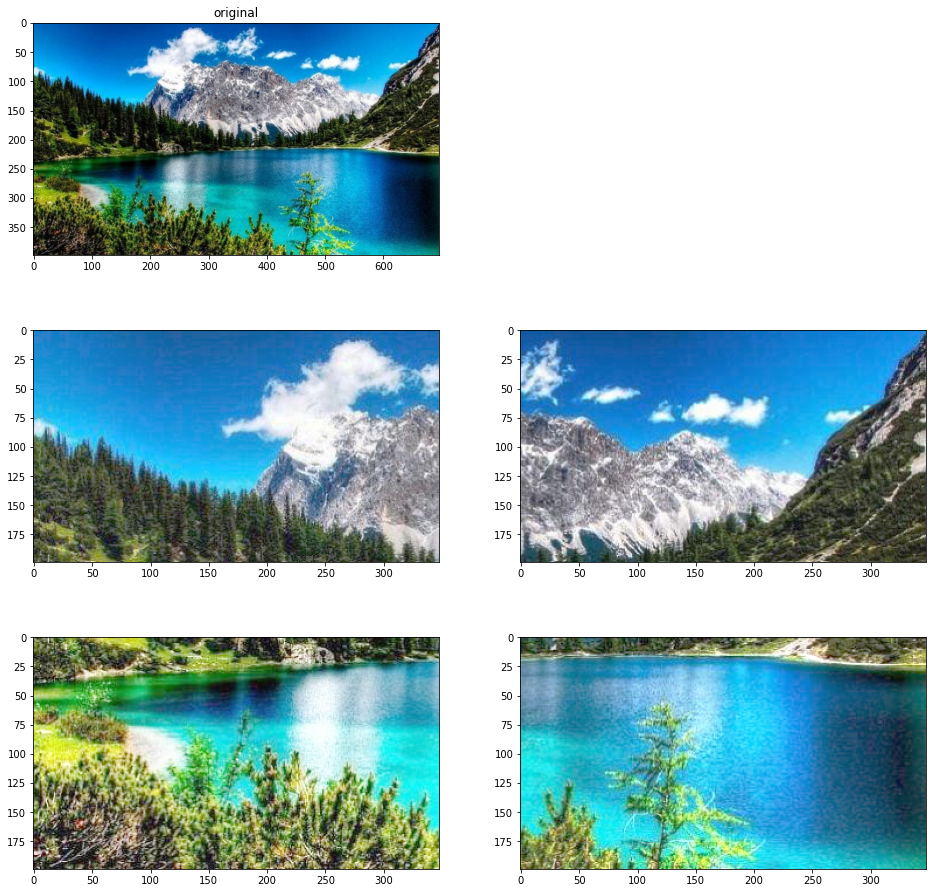

In [ ]:
original_image_eq1 = exposure.equalize_hist(original_image1)
original_image_eq2 = exposure.equalize_hist(original_image2)
original_image_eq3 = exposure.equalize_hist(original_image3)
original_image_eq4 = exposure.equalize_hist(original_image4)



fig = plt.figure(figsize=(16, 16))

# Subplot for original image
a=fig.add_subplot(3,2,1)
plt.imshow(control_image)
a.set_title('original')

# Subplot for processed image
a=fig.add_subplot(3,2,3)
imgplot = plt.imshow(original_image_eq1)

# Subplot for processed image
a=fig.add_subplot(3,2,4)
imgplot = plt.imshow(original_image_eq2)

# Subplot for processed image
a=fig.add_subplot(3,2,5)
imgplot = plt.imshow(original_image_eq3)

# Subplot for processed image
a=fig.add_subplot(3,2,6)
imgplot = plt.imshow(original_image_eq4)


plt.show()



Ejercicio 2.

Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.

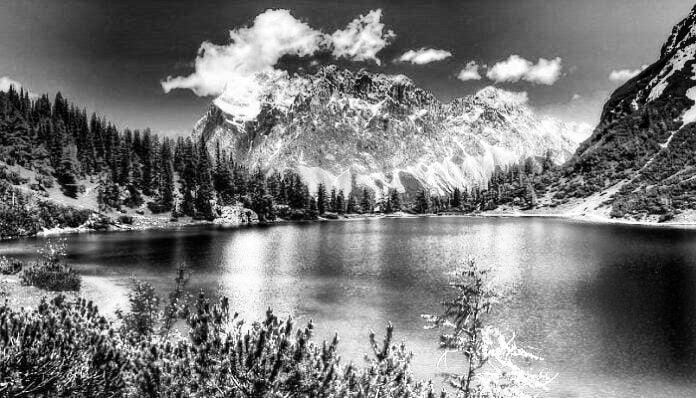

(398, 696)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



def swahe(img):
    height, width = img.shape[:2]
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(height, width))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(1,40))
    img = clahe.apply(img)
    return img

img = cv2.imread('/data/image.jpg', 0) # esto es para hacerla gray scale desde el princio , si no hay gray scale no funciona al parecer
img = swahe(img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(img.shape[:2])

Ejercicio 3.

Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.


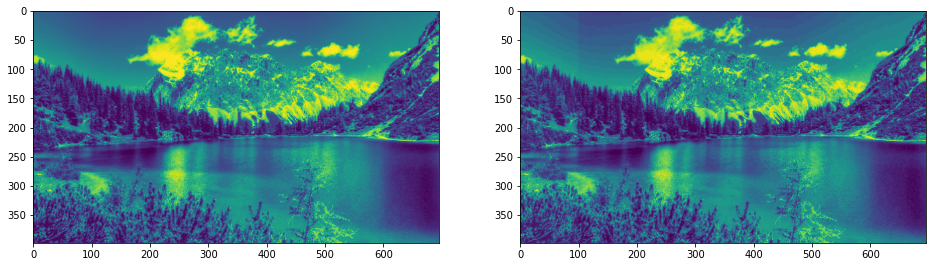

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# Load grayscale image
img_control = cv2.imread("/data/image.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("/data/image.jpg", 0)

# Define the ROI coordinates and create a mask
x, y, w, h = 0, 0, 100,400
mask = np.zeros_like(img)
mask[y:y+h, x:x+w] = 1

# Increase brightness in the masked region
bright_img = img + 200
bright_img[bright_img > 255] = 255

# Composite the masked region back into the original image
# result = cv2.addWeighted(img, 1-mask, bright_img, mask, 0)
result = cv2.addWeighted(img, 0.1,mask,0.9, 0)

# plt.imshow(result)

fig = plt.figure(figsize=(16, 16))

a=fig.add_subplot(1,2,1)
plt.imshow(img)

a=fig.add_subplot(1,2,2)
plt.imshow(result)


plt.show()